<a href="https://colab.research.google.com/github/rvssridatta/OpenCV/blob/main/AIThermometer/AIThermometer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2

In [2]:
base_dir = '/content'#'Computer Vision Projects/Thermal Screening Project/'
threshold = 200
area_of_box = 700        # 3000 for img input
min_temp = 102           # in fahrenheit
font_scale_caution = 1   # 2 for img input
font_scale_temp = 0.7    # 1 for img input

In [3]:
def convert_to_temperature(pixel_avg):
  return pixel_avg/2.25

In [50]:
def process_frame(frame):

  

  frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
  heatmap_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
  heatmap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_HOT)

  #binary threshold
  _, binary_thresh = cv2.threshold(heatmap_gray, threshold, 255, cv2.THRESH_BINARY)

  #image opening: erosion followed by dilation
  kernel = np.ones((3,3), np.uint8)
  image_erosion = cv2.erode(binary_thresh, kernel, iterations=1)
  image_opening = cv2.dilate(image_erosion, kernel, iterations=1)

  #get contours from the image obatined by opening operation
  contours, _ = cv2.findContours(image_opening,1,2)

  image_with_rectangles =np.copy(heatmap)
  

  for contour in contours:
    #rectangle over each contour
    x, y, w, h = cv2.boundingRect(contour)

    #pass if the area of rectangle is not large enough
    if (w)*(h) < area_of_box:
      # print("import pdb;pdb.set_trace()")
      continue
    
    #mask is boolean type of matrix.
    mask = np.zeros_like(heatmap_gray)
    cv2.drawContours(mask, contour, -1, 255, -1)
    # import pdb;pdb.set_trace()

    #mean of only those pixels which are in blocks and not the whole rectangel selected
    mean = convert_to_temperature(cv2.mean(heatmap_gray, mask=mask)[0])

    #colors for rectangles and textmin_area
    temperature = round(mean, 2)
    color = (0, 255, 0) if temperature < min_temp else (255, 255, 127)

    #callback funtion if the following condition is true
    if temperature >= min_temp:
      #callback function here
      cv2.putText(image_with_rectangles, "high temp detected!!!", (35,40),
                  cv2.FONT_HERSHEY_SIMPLEX, font_scale_caution, color, 2, cv2.LINE_AA)

    #DRAW rectangles for visualisation
    image_with_rectangles = cv2.rectangle(image_with_rectangles, (x,y),(x+w, y+h), color, 2)

    # write temperature for each reactangle
    cv2.putText(image_with_rectangles, "{} F".format(temperature), (x, y),
                cv2.FONT_HERSHEY_SIMPLEX, font_scale_temp, color, 2, cv2.LINE_AA)
    
  return image_with_rectangles



In [51]:
img1 = cv2.imread('/content/thermo1.jpg')
img = cv2.imread('/content/thermo2.jpg')

In [52]:
from google.colab.patches import cv2_imshow

In [53]:
#process the image
processed_img = process_frame(img)

In [54]:
type(processed_img)

numpy.ndarray

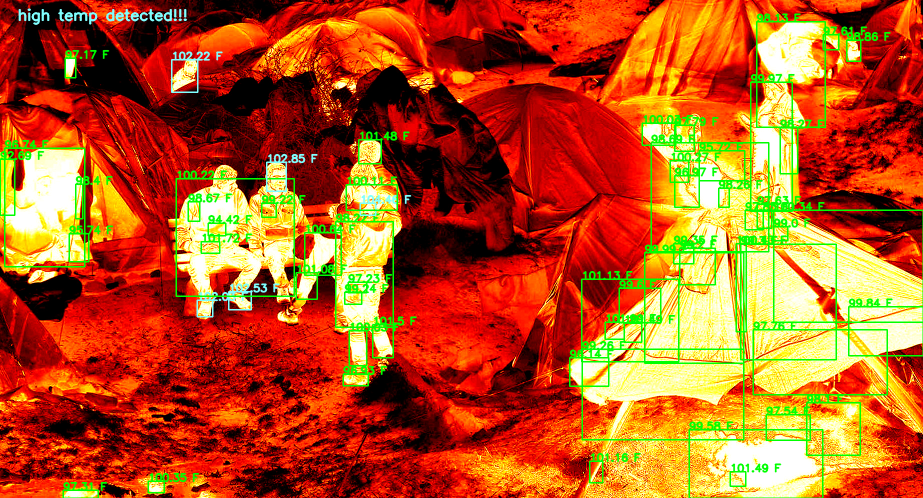

In [55]:

height, width, _ = processed_img.shape
dim = (int(width*0.5), int(height*0.5))

resized_img = cv2.resize(processed_img, dim, interpolation=cv2.INTER_AREA)
# cv2.imwrite(str(base_dir + "output_image.jpg"), resized_img)

# saved_img = cv2.imread(str(base_dir + '/output_image.jpg'))
cv2_imshow(resized_img)
# cv2.waitKey(0)